In [1]:

import numpy
from pandas import read_csv
from pandas import *

#open and clean the dataset

#input dataset
filename='daily_NO2_2019.csv'
names=['Latitude','Longitude','Date Local','Arithmetic Mean']
dataset=read_csv(filename,names=names)


dataset101=dataset.drop_duplicates(subset=['Latitude'])
dataset1=dataset.pivot_table(index = 'Date Local',columns = 'Latitude',values = 'Arithmetic Mean')#transform long data format into wide format
dataset11=dataset1.dropna(axis=1, how='any')#delete sites which includes NaN data
dataset111=dataset11.values.T
print(dataset11)

#get information of latitudes and longitudes as lists
latitudes=dataset11.columns.values.tolist()
longitudes=[]
for i in range(len(latitudes)):
    long1=dataset101.Longitude[dataset101['Latitude'] == latitudes[i]].tolist()
    long2=float(long1[0])
    longitudes.append(long2)


#X_train prepared
from tslearn.utils import to_time_series_dataset
formatted_dataset = to_time_series_dataset(dataset111)#formatted
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
X_train = formatted_dataset
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)#normalized
sz = X_train.shape[1]


Latitude    19.509778  19.555444  25.892518  27.290556  27.599444  29.922894  \
Date Local                                                                     
43466        2.418750   5.270833  16.520834  10.447916  14.245833  18.725000   
43467        3.566667   4.704167  10.520834   6.202084   9.408334   4.021739   
43468        1.679167   5.225000   5.133333   5.325000   8.000000   2.408333   
43469        3.010417   4.225000   9.041666   4.927272  11.522728   4.928261   
43470        3.214583   7.169203   4.704167   5.604166   6.500000   7.725000   
...               ...        ...        ...        ...        ...        ...   
43826        1.408333   1.500000   4.725000   5.243750   5.725000   8.112500   
43827        2.577083   0.725000   8.225000   3.129167  11.408334   2.745833   
43828        1.815761   2.041666  18.725000   5.318750   2.112500   2.745833   
43829        1.327084   1.302174   3.520834   7.125000   3.020834   3.337500   
43830        2.566667   3.520834   4.929

D:\some program\python\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


Euclidean k-means
399.197 --> 230.332 --> 227.218 --> 227.002 --> 227.002 --> 
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        0
3    -82.507222  27.290556        0
4    -99.533333  27.599444        0
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        0
127 -104.676944  47.867900        0
128 -107.862471  48.317507        0
129 -122.456463  48.760036        2

[130 rows x 3 columns]


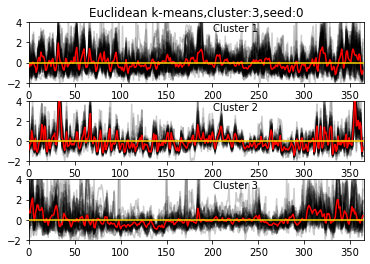

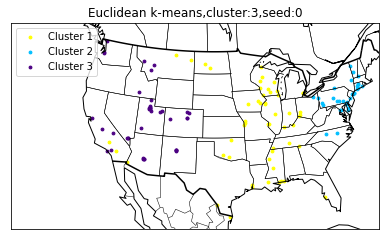

Euclidean k-means
536.356 --> 265.583 --> 260.675 --> 257.751 --> 254.932 --> 252.018 --> 248.984 --> 239.049 --> 235.981 --> 235.981 --> 
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        0
3    -82.507222  27.290556        0
4    -99.533333  27.599444        0
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        1
127 -104.676944  47.867900        0
128 -107.862471  48.317507        0
129 -122.456463  48.760036        2

[130 rows x 3 columns]


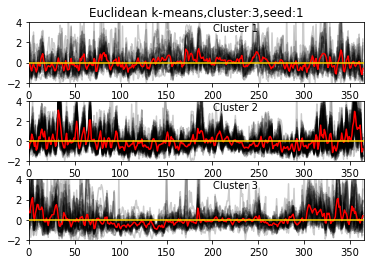

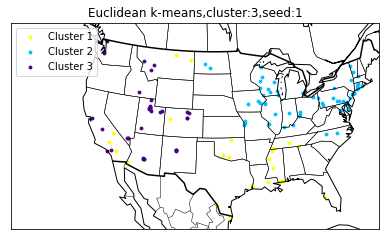

Euclidean k-means
405.052 --> 230.214 --> 228.293 --> 227.348 --> 227.156 --> 227.029 --> 227.029 --> 
[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0]
            lon        lat  Cluster
0   -155.913417  19.509778        2
1   -155.102028  19.555444        0
2    -97.493830  25.892518        2
3    -82.507222  27.290556        2
4    -99.533333  27.599444        2
..          ...        ...      ...
125 -122.462560  47.226340        0
126 -101.766944  47.298611        2
127 -104.676944  47.867900        2
128 -107.862471  48.317507        2
129 -122.456463  48.760036        0

[130 rows x 3 columns]


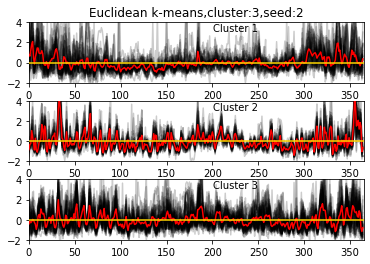

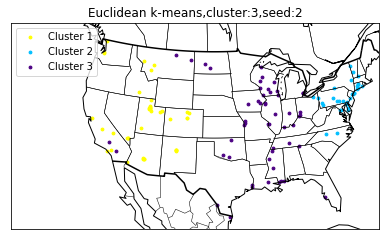

Euclidean k-means
374.344 --> 217.581 --> 210.336 --> 208.037 --> 207.865 --> 207.613 --> 207.412 --> 206.834 --> 206.229 --> 206.081 --> 206.081 --> 
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 2, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 3, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 0, 0, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        0
3    -82.507222  27.290556        0
4    -99.533333  27.599444        0
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        3
127 -104.676944  47.867900        0
128 -107.862471  48.317507        0
129 -122.456463  48.760036        2

[130 rows x 3 columns]


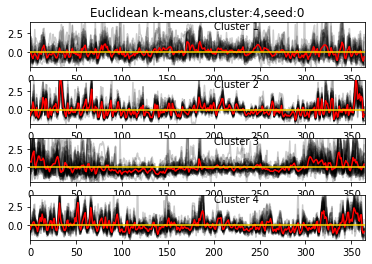

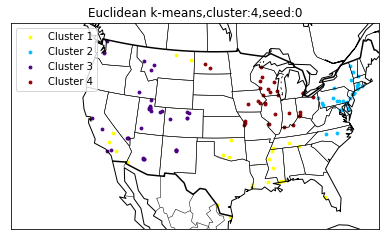

Euclidean k-means
421.903 --> 232.847 --> 230.662 --> 229.710 --> 229.389 --> 229.389 --> 
[0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        1
3    -82.507222  27.290556        1
4    -99.533333  27.599444        1
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        3
127 -104.676944  47.867900        3
128 -107.862471  48.317507        3
129 -122.456463  48.760036        2

[130 rows x 3 columns]


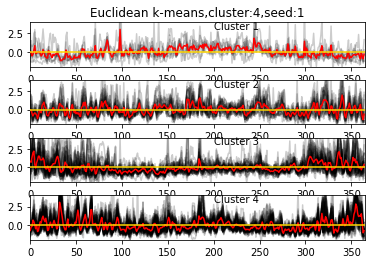

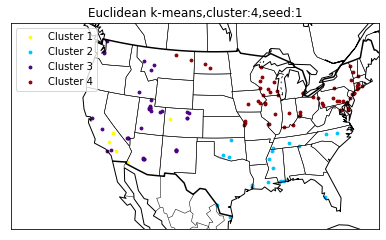

Euclidean k-means
361.448 --> 225.199 --> 220.304 --> 217.031 --> 216.084 --> 215.875 --> 215.875 --> 
[2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 3, 3, 3, 0, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0]
            lon        lat  Cluster
0   -155.913417  19.509778        2
1   -155.102028  19.555444        3
2    -97.493830  25.892518        2
3    -82.507222  27.290556        2
4    -99.533333  27.599444        2
..          ...        ...      ...
125 -122.462560  47.226340        0
126 -101.766944  47.298611        2
127 -104.676944  47.867900        2
128 -107.862471  48.317507        2
129 -122.456463  48.760036        0

[130 rows x 3 columns]


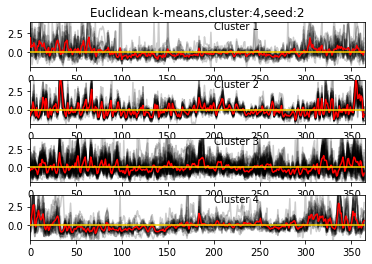

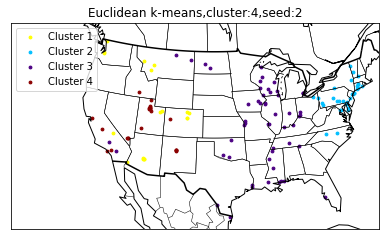

Euclidean k-means
346.473 --> 212.485 --> 202.618 --> 201.245 --> 201.081 --> 200.948 --> 200.948 --> 
[0, 2, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 0, 2, 0, 0, 4, 2, 0, 4, 2, 2, 4, 2, 4, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 4, 4, 4, 1, 4, 0, 1, 1, 1, 0, 4, 4, 0, 2, 1, 1, 2, 2, 4, 4, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 4, 4, 4, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        0
3    -82.507222  27.290556        4
4    -99.533333  27.599444        0
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        0
127 -104.676944  47.867900        0
128 -107.862471  48.317507        0
129 -122.456463  48.760036        2

[130 rows x 3 columns]


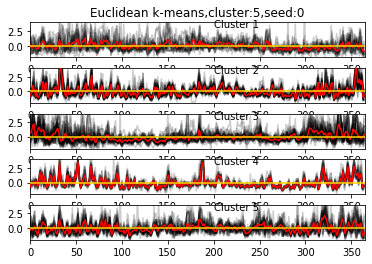

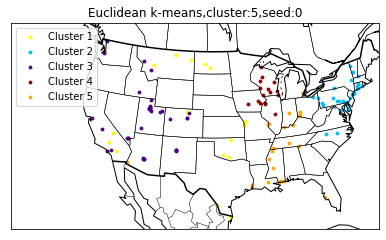

Euclidean k-means
341.683 --> 203.672 --> 200.140 --> 199.176 --> 199.014 --> 199.014 --> 
[0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 4, 4, 2, 2, 2, 0, 3, 2, 2, 2, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 0, 4, 4, 2, 2, 3, 3, 4, 3, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 2, 3, 4, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        1
3    -82.507222  27.290556        1
4    -99.533333  27.599444        1
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        3
127 -104.676944  47.867900        3
128 -107.862471  48.317507        3
129 -122.456463  48.760036        2

[130 rows x 3 columns]


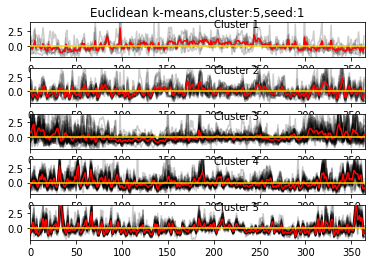

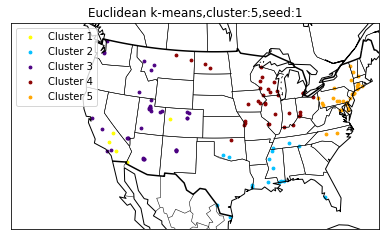

Euclidean k-means
330.784 --> 206.221 --> 200.393 --> 196.833 --> 196.216 --> 196.216 --> 
[4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 1, 1, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 3, 3, 2, 2, 2, 3]
            lon        lat  Cluster
0   -155.913417  19.509778        4
1   -155.102028  19.555444        3
2    -97.493830  25.892518        4
3    -82.507222  27.290556        4
4    -99.533333  27.599444        4
..          ...        ...      ...
125 -122.462560  47.226340        3
126 -101.766944  47.298611        2
127 -104.676944  47.867900        2
128 -107.862471  48.317507        2
129 -122.456463  48.760036        3

[130 rows x 3 columns]


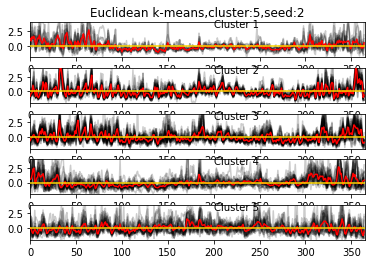

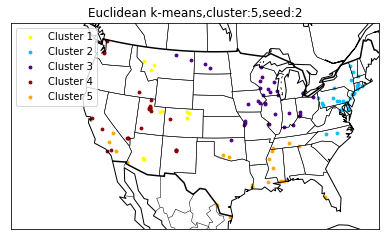

Euclidean k-means
324.605 --> 191.560 --> 188.839 --> 188.839 --> 
[0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 2, 5, 2, 0, 0, 4, 2, 5, 4, 2, 2, 4, 2, 4, 1, 1, 2, 2, 2, 5, 0, 2, 2, 2, 4, 4, 4, 1, 4, 0, 1, 1, 1, 0, 4, 4, 0, 2, 1, 1, 2, 2, 4, 4, 1, 4, 1, 4, 1, 1, 1, 2, 2, 2, 2, 4, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 4, 1, 1, 4, 3, 3, 1, 3, 3, 1, 1, 2, 3, 1, 4, 4, 4, 3, 1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        0
1   -155.102028  19.555444        2
2    -97.493830  25.892518        5
3    -82.507222  27.290556        5
4    -99.533333  27.599444        5
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        0
127 -104.676944  47.867900        0
128 -107.862471  48.317507        0
129 -122.456463  48.760036        2

[130 rows x 3 columns]


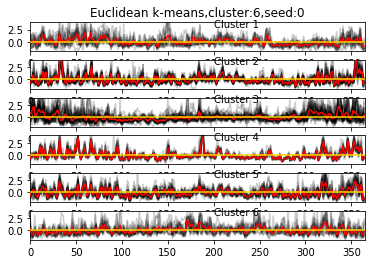

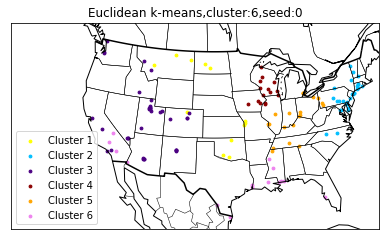

Euclidean k-means
327.188 --> 194.963 --> 192.708 --> 192.067 --> 191.861 --> 191.861 --> 
[5, 2, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 4, 5, 2, 2, 2, 0, 3, 2, 2, 2, 5, 5, 3, 4, 3, 3, 4, 4, 4, 3, 5, 5, 3, 0, 4, 4, 2, 2, 5, 5, 4, 3, 4, 5, 4, 4, 4, 2, 2, 2, 2, 5, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 5, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, 2, 3, 5, 5, 5, 5, 3, 4, 2, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2]
            lon        lat  Cluster
0   -155.913417  19.509778        5
1   -155.102028  19.555444        2
2    -97.493830  25.892518        5
3    -82.507222  27.290556        1
4    -99.533333  27.599444        5
..          ...        ...      ...
125 -122.462560  47.226340        2
126 -101.766944  47.298611        3
127 -104.676944  47.867900        3
128 -107.862471  48.317507        3
129 -122.456463  48.760036        2

[130 rows x 3 columns]


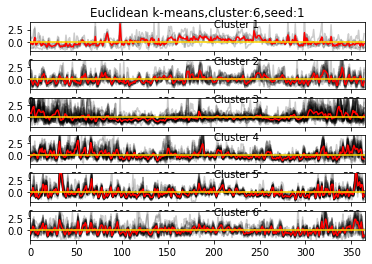

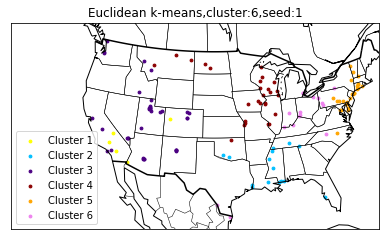

Euclidean k-means
308.402 --> 194.647 --> 192.558 --> 192.127 --> 192.127 --> 
[2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 3, 4, 3, 2, 2, 2, 3, 4, 4, 3, 3, 2, 3, 2, 1, 1, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2, 2, 1, 5, 1, 1, 1, 1, 1, 0, 3, 3, 0, 1, 3, 2, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 5, 5, 1, 5, 5, 1, 1, 3, 5, 1, 5, 5, 5, 5, 1, 3, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 5, 3, 5, 5, 5, 0, 3, 3, 5, 2, 5, 3]
            lon        lat  Cluster
0   -155.913417  19.509778        2
1   -155.102028  19.555444        3
2    -97.493830  25.892518        4
3    -82.507222  27.290556        4
4    -99.533333  27.599444        4
..          ...        ...      ...
125 -122.462560  47.226340        3
126 -101.766944  47.298611        5
127 -104.676944  47.867900        2
128 -107.862471  48.317507        5
129 -122.456463  48.760036        3

[130 rows x 3 columns]


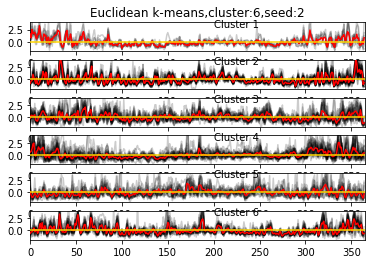

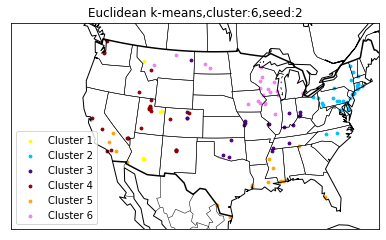

"\ndef scatterLegend(data, labels, x, y):\n    type1 = []\n    type2 = []\n    type3 = []\n    for i in range(len(labels)):\n        if labels[i] == 1:\n            type1.append(np.array(data[i]))\n        elif labels[i] == 2:\n            type2.append(np.array(data[i]))\n        else:\n            type3.append(np.array(data[i]))\n    type1 = np.array(type1)\n    type2 = np.array(type2)\n    type3 = np.array(type3)\n    g1 = plt.scatter(type1[:, x], type1[:, y], c='red')\n    g2 = plt.scatter(type2[:, x], type2[:, y], c='yellow')\n    g3 = plt.scatter(type3[:, x], type3[:, y], c='blue')\n    plt.legend(handles=[g1, g2, g3], labels=['not at all', 'a small doses', 'a large doses'])\n    \nscatterLegend(data, labels, 0, 1)\n"

In [85]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt  
#2019,NO2,cluster=3,seed=0
#training—TimeSeriesKMeans
def TSK(n_cluster,seed):
    
    print("Euclidean k-means")
    km = TimeSeriesKMeans(n_cluster,verbose=True,random_state=seed) 
    #print(X_train)
    y_pred = km.fit_predict(X_train)
    y1=y_pred.tolist()
    cluster=numpy.array(y1)
    print(y1)

    LonLatClusters=pandas.DataFrame({'lon':longitudes,'lat':latitudes,'Cluster':y1})#conbine longitudes,latitudes and the corresponding cluster output in the form of dataframe
    print(LonLatClusters)
    
    #draw the time series clusters
    plt.figure()
    for yi in range(n_cluster):
        plt.subplot(n_cluster ,1, yi + 1)  #plt.subplot（numbRow，numbCol ，plotNum）
        for xx in X_train[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2,zorder=1) #k-:black
        plt.plot(km.cluster_centers_[yi].ravel(), "r-",zorder=5)
        plt.hlines(0,0,365,color='#FFD700',zorder=10)#draw the average guideline
        plt.xlim(0, sz)
        plt.ylim(-2, 4)
        plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
                 transform=plt.gca().transAxes)
        if yi == 0:
            plt.title('NO2,2019,Euclidean k-means,cluster:%d,seed:%d'% (n_cluster,seed))
    plt.subplots_adjust(hspace=0.3) #adjust the vertical space between subplots

    #draw the clutering results
    #draw the map
    
    fig=plt.figure(figsize=(7.6, 3.8)) 
    m= Basemap(llcrnrlon=-130, llcrnrlat=20, urcrnrlon=-65, urcrnrlat=49,projection='lcc',lat_1=24, lat_2=45, lon_0=-100)
    m.drawcountries(linewidth=1.5) 
    m.drawcoastlines()  
    m.drawstates()       
    #draw the datapoints
    #lon, lat = m(longitudes,latitudes)# longitudes, latitudes in the form of lists 
    #m.scatter(lon,lat,c=y1)
    color=['#FFFF00','#00BFFF','#4B0082','#8B0000','#FFA500', '#EE82EE']
    for j in range(n_cluster):
        lons=[]
        lats=[]
        for i in range(len(y1)):
            if y1[i]==j:
                lons.append(longitudes[i])
                lats.append(latitudes[i])
        lon, lat = m(lons,lats)
        m.scatter(lon,lat,c=color[j],label='Cluster %d' % (j + 1),s=8)
    #m.scatter(lon,lat,c=y1) #mark the points on the map
    plt.legend()
    plt.title('NO2,2019,Euclidean k-means,cluster:%d,seed:%d'% (n_cluster,seed))
    plt.show()
    
TSK(3,0)
TSK(3,1)
TSK(3,2)
TSK(4,0)
TSK(4,1)
TSK(4,2)
TSK(5,0)
TSK(5,1)
TSK(5,2)
TSK(6,0)
TSK(6,1)
TSK(6,2)